# Test Bench for the Insider/Outsider Model
Please select the model to test. Note that the model is not stored in the default path.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from imports import *
from data import *
from arch import *
model = return_token_model(CORE_MODEL, len(labels), preferred_cuda_test);
#model.load_state_dict(torch.load(CHECKPOINT_PATH + ROOT_NAME + '3_17000.pt')["model_state_dict"]);
#model.load_state_dict(torch.load("/mnt/SSD2/pholur/CTs/checkpoints/Day_0928_Insider_Outsider_79_54480.pt")["model_state_dict"]);
#model.load_state_dict(torch.load("/mnt/SSD2/pholur/CTs/checkpoints/finalized_checkpoints/Day_1007_Insider_Outsider_49_34050.pt")["model_state_dict"]);
model.load_state_dict(torch.load(MODEL_IN_TESTING)["model_state_dict"]);
#model.load_state_dict(torch.load("/mnt/SSD2/pholur/CTs/checkpoints/Day_1006_Insider_Outsider_21_14982.pt")["model_state_dict"]);
model.eval();

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForTokenClassification: ['vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_projector.bias', 'vocab_projector.weight', 'vocab_transform.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForTokenClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN t

## Import Model for Automatic Entity Extraction from text
Note: For some weird reason the same model seems to extract different entities. (only about <100 entities are aligned wrong and do not affect the result.) <br />
*You can change en_core_web_sm to en_core_web_lg to get more accurate results.*

In [3]:
from shared_train_and_test_functions import tokenization
import spacy
from spacy import displacy
import nltk
nlp = spacy.load('en_core_web_sm')
# ONLY WORKS FOR SINGLE POST TESTING

## The Insider/Outsider Inference Function (Important: Please read in full)
1. spaCy returns spans of the entity mentions that we use directly to extract from a post.
2. For each span (noun phrase), we collect all the tokens via the tokenizer that are at least overlapping and at most within the span of the noun phrase.
3. An entity is an outsider if and only if at least one of the tokens is a clear outsider.
4. Other entities default to insiders.

In [4]:
from data import *
from primitive_baselines import *

# def return_insiders_and_outsiders(text, option_display=False):
#     text = text.lower()
#     text = clean_text(text)
#     doc = nlp(text)
#     add_np_text = []
#     spans = []
#     for npy in doc.noun_chunks:
#         add_np_text.append(npy.text)
#         spans.append((npy.start_char, npy.end_char))

#     test_encodings, tokens = tokenization([text], True) # you can print the tokens here for debugging
#     offset_mappings = test_encodings.offset_mapping[0]

#     input_ids = torch.tensor(test_encodings['input_ids']).to(preferred_cuda_test)
#     attention_mask = torch.tensor(test_encodings['attention_mask']).to(preferred_cuda_test)
#     outputs = model(input_ids, attention_mask=attention_mask) # try this: labels = torch.tensor([0]*len(input_ids)).to(preferred_cuda_test))
#     predictions = outputs[0].detach().cpu().numpy()
#     single_prediction_post = predictions[0]
#     predictions_argmax = np.argmax(single_prediction_post, axis=1)

#     ents = []
#     total_true = {}

#     for i in range(len(spans)):
#         total_true[i] = False
    
#     for j in range(len(spans)):
        
#         choice = "no"
#         for i,index in enumerate(predictions_argmax):
#             current_token_mapping = offset_mappings[i]
 
#             if current_token_mapping[0] >= spans[j][0] and current_token_mapping[1] <= spans[j][1]: # if the token is in the span of a chunk
#                 if index == 2:
#                     choice = "yes"
#                 else:
#                     choice = "no"

#         if choice == "no":
#             ents.append({"start": spans[j][0], "end": spans[j][1], "label": "INSIDER"})
#         else:
#             ents.append({"start": spans[j][0], "end": spans[j][1], "label": "OUTSIDER"})

#     # Requirements for using Displacy correctly
#     # 1. Deduplicate list of dictionaries
#     ents = [dict(t) for t in {tuple(d.items()) for d in ents}]

#     # 2. Sort list of dictionaries by start index
#     ents = sorted(ents, key=lambda x: x['start'])

#     options = {"colors": {"INSIDER":"#88C6F1", "OUTSIDER":"#FF82AB"}} #blue, #red
#     ex = [{"text": text, "ents": ents}]

#     if option_display == True: # return for show
#         displacy.render(ex, style="ent", manual=True, options=options)
        
#     else: # return the ents for compute
#         dictionary_map = {}
#         for ent in ents:
#             np_all = text[ent['start']:ent['end']].lower()
#             np_all = clean_text(np_all)
#             dictionary_map[np_all] = ent['label']
#         return dictionary_map

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForTokenClassification: ['vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_projector.bias', 'vocab_projector.weight', 'vocab_transform.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForTokenClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN t

## A Unit test bench to try out Custom Posts
Posts is a list of contiguous thoughts. Each element in this list can be a group of sentences.

In [8]:
#posts = ["Bill Gates is developing a vaccine. Vaccines kill people.", "Bill Gates is developing a vaccine. Vaccines save people."]
#posts = ["I think that tech will kill me with vaccines. People like Bill Gates are developing this for the money. My friend, Sarah, who is a doctor, told me not to get the vaccine, because it causes small pox."]
#posts = ["Microchips are inserted into vaccines.", "5g really causes cancer", "5g is really good for the economy.", "We should destroy cell phone towers.", "We should build cell phone towers.", "Radio waves are as intrusive as vaccines.", "Microchips are useful in making phones.", "Microchips are telling the government where we are 24/7.", "Vaccines contain chemicals.", \
#   ">doesn't make sense how is wanting safety for a new experimental drug not make sense? even if you got the vaccine you still run risk to get covid, need to isolate and wear a mask, and still have the same risk of death. the company even hid any side effects and threatened to sue anyone mentioning side effects. the people taking the vaccine now are just part of the testing trials, they are volunteer test subjects, since we don't even know long term effects or any effect past 1 year of taking it"]
#posts = ["I think that tech will save me with vaccines. People like Bill Gates are developing this to save people. My friend, Sarah, who is a doctor, told me to get the vaccine, because it prevents small pox."]
#posts = ["MSM and Propaganda Bun When The Narrative Replaces The News The Tale Wags The Dog As News Becomes Propaganda Rex Murphy talks Trudeau modern journalism with Holly Doan from Blacklock's Reporter (video) FUREY: The media has failed to report the facts about COVID-19 (video) Operation Mockingbird: Deep State Control of the Media | CIA Media Manipulation Ryerson School of Journalism Goes Woke Canadian media ignores Middle Eastern shadow war (video) Tucker Carlson compares Trudeau to Mussolini slams COVID-19 isolation facilities MORE NURSES & DOCTORS REFUSE VACCINE! - MEDIA SMEARS THEM! - THIS IS INSANE! (bitchute link)"]
#posts = ["So Im assuming if you ever took a flu shot or any shot at any point, you had no idea they werent liable huh? Almost as if no one or the media told you or wanted you to know Also they have a VAERS (vaccine adverse reaction system) where ANYONE can report ANYTHING to it just so it cant be taken seriously while also looking like it takes it seriously because they have a database for it. But why take that serious because anyone can report to it right? Its setup that way"]
#posts = ["Gonna go out on a very sturdy limb and say that there's little chance schools will reopen until there is a vaccine. They'd better be using the time we have before fall semester in getting their distance learning game plan in order."]
for p in posts:
    return_insiders_and_outsiders(p, True)

In [1]:
# adversarial examples
from data_aug import data_aug

In [23]:
texts = ["The awesome microchips power our phones.","I love microchips.","Microchips have helped us survive."]
total_posts = []
for t in texts:
    total_posts.extend(data_aug(t))

/home/pholur/miniconda3/envs/sit/lib/python3.7/site-packages/transformers/pipelines/base.py:901: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  UserWarning,


In [24]:
labels_1 = {0:0, 1:0, 2:0}
for p in total_posts[:]:
    dic = return_insiders_and_outsiders(p, False, "microchips", False)
    labels_1[dic["microchips"]] += 1
print(labels_1[0]/(labels_1[0]+labels_1[2]))

0.6666666666666666


(array([33.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 17.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

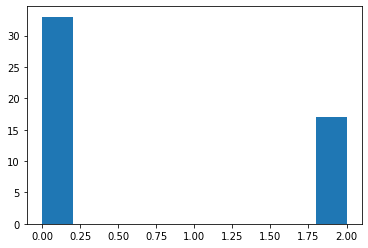

In [17]:
import matplotlib.pyplot as plt
plt.hist(labels_1)

## Consensus testing on the entire holdout test set
1. The performance on the test set should at least resemble the performance on the validation set.
2. Performance is computed via cross-entropy: however, one can compute the performance via at-least 1 accuracy.

In [9]:
# test_loss = 0
# number_of_test_batches = 0
# test_loader = get_data(INPUT_DATA_PATH, FLAG, AUG, REEXTRACT, FRACTION, "test")

# for j,test_batch in enumerate(test_loader):
#     input_ids = test_batch['input_ids'].to(preferred_cuda_test)
#     attention_mask = test_batch['attention_mask'].to(preferred_cuda_test)
#     labels = test_batch['labels'].to(preferred_cuda_test)
#     with torch.no_grad():
#         outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
#         test_loss += outputs[0]
#     number_of_test_batches += 1
# print("Total test loss:", test_loss/number_of_test_batches)

## Getting all the posts ever found about vaccines by our scraper

In [49]:
df = pd.read_csv(INPUT_DATA_PATH)
posts = list(set(list(df["Post"])))
len(posts)

2329

## Extracting the Insider/Outsider Votes by Consensus for all entities from the Posts

In [61]:
from tqdm import tqdm
# find relevant entities
ents = {}
ents_sents = {}

for i,p in tqdm(enumerate(posts[:])):
    returned_dictionary = return_insiders_and_outsiders(p, False)
    for key in returned_dictionary:
        key_ = clean_text(key)
        key_ = key_.lower()
        key_ = clean2(key_)
        if key_ not in ents:
            ents[key_] = [returned_dictionary[key]]
        else:
            ents[key_].append(returned_dictionary[key])

        if key_ not in ents_sents:
            ents_sents[key_] = [p]
        else:
            ents_sents[key_].append(p)

import pickle
with open(DEPOSIT_PATH + 'ents_to_votes.pkl', 'wb') as f:
    pickle.dump(ents, f)
with open(DEPOSIT_PATH + 'ents_to_posts.pkl', 'wb') as f:
    pickle.dump(ents_sents, f)

2329it [01:24, 27.66it/s]


In [72]:
ents["vaccine"]

[0,
 0,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 0,
 0,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 0,
 2,
 2,
 0,
 0,
 2,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 0,
 0,
 0,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 2,


Above function takes time and you can just load this. Note however, that changing the model requires rerunning these extractions.

Text(0, 0.5, 'Number')

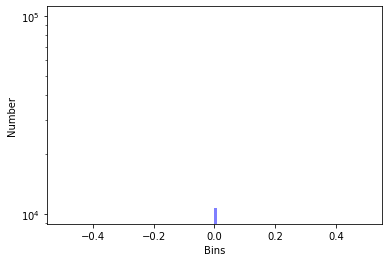

In [71]:
import pickle
with open(DEPOSIT_PATH + "ents_to_votes.pkl", "rb") as f:
    ents = pickle.load(f)

histo = []
histo_insider = []
histo_outsider = []
val_i = 0
val_o = 0

for k in ents:
    val_i = 0
    val_o = 0
    histo.append(len(ents[k]))
    for ent in ents[k]:
            if ent == "INSIDER":
                val_i += 1
            elif ent == "OUTSIDER":
                val_o += 1
    histo_insider.append(val_i)
    histo_outsider.append(val_o)

import matplotlib.pyplot as plt
# plt.hist(histo, bins=100, color='y', alpha=0.5, label='All')
# plt.yscale("log")
# plt.xlabel("Bins")
# plt.ylabel("Number")

# plt.hist(histo_insider, bins=100, color='b', alpha=0.5, label="Insider")
# plt.yscale("log")
# plt.xlabel("Bins")
# plt.ylabel("Number")

# plt.hist(histo_outsider, bins=100, color='r', alpha=0.5, label="Outsider")
# plt.yscale("log")
# plt.xlabel("Bins")
# plt.ylabel("Number")
# plt.legend()
# plt.show()

## Compute the uncertainty in the consensus vote for each entity
more uncertainty does not mean less valuable - see "vaccine" for an example

In [82]:
ents["vaccine"]

[0,
 0,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 0,
 0,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 0,
 2,
 2,
 0,
 0,
 2,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 0,
 0,
 0,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 2,


In [83]:
import math
ents_counts = {}
uncertainty = {}
for k in ents:
    values = ents[k]
    if k not in ents_counts:
        ents_counts[k] = (0.00001,0.00001)
    for v in values:
        if v == 0:
            ents_counts[k] = (ents_counts[k][0] + 1, ents_counts[k][1])
        elif v == 2:
            ents_counts[k] = (ents_counts[k][0], ents_counts[k][1] + 1)
    # compute binary cross entropy
    uncertainty[k] = -(ents_counts[k][0]/len(values))*math.log(ents_counts[k][0]/len(values)) - (ents_counts[k][1]/len(values))*math.log(ents_counts[k][1]/len(values))

import plotly.express as px
px.histogram(uncertainty.values(), log_y = True)   
# plt.xlabel("Bins")
# plt.ylabel("Uncertainty")
# plt.yscale("log")
# plt.show() 

## Examples of Entities with a Lot of Uncertainty

In [84]:
i = 0
for k in uncertainty:
        if uncertainty[k] > 0.7 and len(ents[k]) > 3: # or uncertainty[k] < 0.1:
            print(k, end=", ")
            print(ents_counts[k], end=", ")


, (3061.0000099999997, 3698.0000099999997), example, (17.00001, 11.00001), lot, (43.00001, 38.00001), point, (45.00001, 42.00001), day, (11.00001, 12.00001), time, (55.00001, 43.00001), top, (5.00001, 5.00001), question, (21.00001, 20.00001), way, (44.00001, 54.00001), world population, (2.00001, 2.00001), many people, (22.00001, 18.00001), hand, (7.00001, 10.00001), someone, (47.00001, 38.00001), everything, (24.00001, 34.00001), idea, (15.00001, 17.00001), part, (18.00001, 26.00001), age, (7.00001, 5.00001), revelation, (2.00001, 2.00001), report, (7.00001, 8.00001), sense, (16.00001, 13.00001), mass, (7.00001, 6.00001), america, (9.00001, 9.00001), politician, (6.00001, 7.00001), race, (3.00001, 4.00001), nobody, (13.00001, 14.00001), obama, (3.00001, 2.00001), grandma, (3.00001, 2.00001), europe, (4.00001, 5.00001), ya, (2.00001, 2.00001), matter, (3.00001, 5.00001), figure, (2.00001, 2.00001), car, (3.00001, 3.00001), dose, (2.00001, 3.00001), 

## See if the Insider/Outsider Model can detect entities not explicitly labeled as insiders or outsiders
1. The next step here is to find those threats that can be revoted by AMT not in the initial set.
2. This is a very important step.
3. DO NOT use the AUGMENTED data during training.
4. We run this section expecting that the model is trained on the entire labeled set (train + val + test).

In [85]:
# import pickle
# var = pickle.load(open("/mnt/SSD2/pholur/CTs/Pickles/train_dataset.pkl", "rb"))
import pandas as pd
df_full_train = pd.read_csv(RAW_TRAIN_DATA_PATH)
train_ents_cleaned = {}

for i,row in df_full_train.iterrows(): # take all the data used for total training NOT done yet
    checker = row["NP"].lower()
    checker = clean_text(checker)
    checker = clean2(checker)
    
    if checker not in train_ents_cleaned:
        train_ents_cleaned[checker] = (0.00001,0.00001)
    if row["sentiment"] == "$AnswerA":
        train_ents_cleaned[checker] = (train_ents_cleaned[checker][0] + 1, train_ents_cleaned[checker][1])
    elif row["sentiment"] == "$AnswerB":
        train_ents_cleaned[checker] = (train_ents_cleaned[checker][0], train_ents_cleaned[checker][1] + 1)
        
final_dict = set(train_ents_cleaned.keys() & ents_counts.keys())
new_dict = {}
for k,v in ents_counts.items():
    if k not in train_ents_cleaned:
            new_dict[k] = v

## Plotting the non-repeats
Notice how there are some terms here that you expect to find in the training set. <br />
This is because the exact entity was not there in the training. But nearby ones were.

In [91]:
def plot_the_insider_outsider_scale(dict_, name_of_file):
    #uncertainty_extra = []
    values_extra = []
    color = []
    names = []
    for k in dict_:

        # add entropy of each value tuple to uncertainty_extra
        #uncertainty_extra.append(uncertainty[k])

        # append difference of values tuple to values_extra
        values_extra.append(dict_[k][0] - dict_[k][1])
        
        if dict_[k][0] > dict_[k][1]:
            color.append("blue")
        else:
            color.append("red")
        names.append(k)

    import numpy as np
    import plotly.express as px
    fig = px.scatter(y=np.random.uniform(low=-10.0, high=+10.0, size=(len(values_extra),)), color=values_extra, x=np.array(values_extra), hover_name=names, \
        opacity=0.5, range_x=[-10,10], range_y=[-12.2,12.2], color_continuous_scale=px.colors.sequential.RdBu, range_color=[-5,5], title="Zero-shot classified Insiders and Outsiders", \
             labels={"x": "{Outsiders} <-----> {Insiders}", "y": "", "color": "Extent of Affiliation"})
    fig.layout.template = 'plotly' # dont change the template
    fig.write_html(name_of_file)
    fig.show()

plot_the_insider_outsider_scale(new_dict, DEPOSIT_PATH + "extra_entities.html")

In [77]:
len(new_dict)

9207

## Instead we now attempt to remove those with even more overlap and maybe even remove some noise
1. Remove stopwords and lemmatize.
2. Remove the ones that are not in the training set after this many to one map.

## Testing tool to verify that this term isn't even a part of an entity of the training set

In [18]:
for k in train_ents_cleaned_lemm:
    if "the mas" in k: # baby powder, chemtrails, elite
        print(k)

## Extract candidate posts for missing entities to assess exactly how the model is doing this

In [19]:
with open(DEPOSIT_PATH + "ents_to_posts.pkl", "rb") as f:
    ents_to_posts = pickle.load(f)

In [20]:
temp_posts = ents_to_posts["elon musk"]
for p in temp_posts:
    return_insiders_and_outsiders(p, True)

In [21]:
# what is sentiment functionally in NLP
# sentiment analysis with narrative extraction